**Описание проекта**

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Шаги для выбора локации обычно такие:
В избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов;
Строят модель для предсказания объёма запасов в новых скважинах;
Выбирают скважины с самыми высокими оценками значений;
Определяют регион с максимальной суммарной прибылью отобранных скважин.
Вам предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. Постройте модель для определения региона, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой Bootstrap.


**Описание данных**

Данные геологоразведки трёх регионов находятся в файлах

  * id — уникальный идентификатор скважины;
  * f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
  * product — объём запасов в скважине (тыс. баррелей).

**Условия задачи:**

Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
Бюджет на разработку скважин в регионе — 10 млрд рублей.
При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

## Загрузка и подготовка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
df_0 = pd.read_csv('/datasets/geo_data_0.csv', decimal = ',')
df_1 = pd.read_csv('/datasets/geo_data_1.csv', decimal = ',')
df_2 = pd.read_csv('/datasets/geo_data_2.csv', decimal = ',')

In [ ]:
df_0.head()

,id,f0,f1,f2,product
0,txEyH,0.7057449842080644,-0.4978225001976334,1.22116994843607,105.28006184349583
1,2acmU,1.3347112926051892,-0.3401642528583136,4.3650803324282,73.03775026515737
2,409Wp,1.0227322634721168,0.15199044457022945,1.4199262386740652,85.26564713099945
3,iJLyR,-0.03217162450743976,0.13903270818447744,2.9785659663204838,168.62077555509563
4,Xdl7t,1.988431059439699,0.15541267777667178,4.751769119262962,154.03664673738086


In [ ]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       100000 non-null  object
 1   f0       100000 non-null  object
 2   f1       100000 non-null  object
 3   f2       100000 non-null  object
 4   product  100000 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [ ]:
df_0['f0'] = pd.to_numeric(df_0['f0'])
df_0['f1'] = pd.to_numeric(df_0['f1'])
df_0['f2'] = pd.to_numeric(df_0['f2'])
df_0['product'] = pd.to_numeric(df_0['product'])

df_1['f0'] = pd.to_numeric(df_1['f0'])
df_1['f1'] = pd.to_numeric(df_1['f1'])
df_1['f2'] = pd.to_numeric(df_1['f2'])
df_1['product'] = pd.to_numeric(df_1['product'])

df_2['f0'] = pd.to_numeric(df_2['f0'])
df_2['f1'] = pd.to_numeric(df_2['f1'])
df_2['f2'] = pd.to_numeric(df_2['f2'])
df_2['product'] = pd.to_numeric(df_2['product'])

Text(0.5, 1.0, 'f_2')

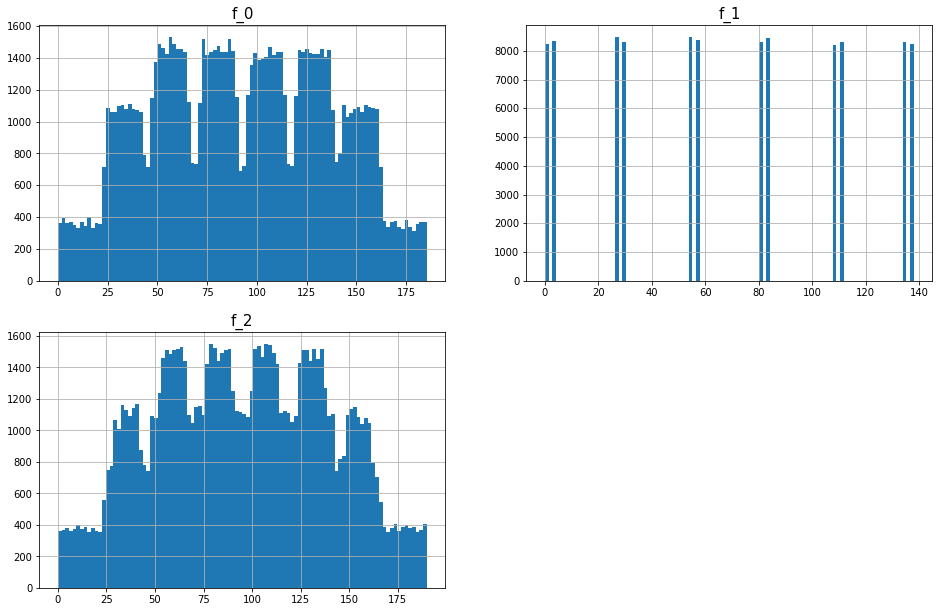

In [ ]:
# Настройка размеров подложки
plt.figure(figsize=(16, 16))

# Вывод графиков
plt.subplot(3, 2, 1)
df_0['product'].hist(bins=100)
plt.title('f_0', fontsize=15)

plt.subplot(3, 2, 2)
df_1['product'].hist(bins=100)
plt.title('f_1', fontsize=15)

plt.subplot(3, 2, 3)
df_2['product'].hist(bins=100)
plt.title('f_2', fontsize=15)

In [ ]:
df_1['product'].unique()

array([  3.17910258,  26.95326103, 134.76630516, 137.94540774,
        84.03888568, 110.99214671,  53.90652206,   0.        ,
       107.81304413,  57.08562465,  30.13236361,  80.85978309])

в первом регионе довольно странные значения объемов ресурсов. Не думаю, что стоит исправлять эти данные (лучше всего обратиться к заказчику)

## Обучение и проверка модели

In [ ]:
def division(df):
    df_train, df_valid = train_test_split(df, test_size=0.25, random_state=12345)
    features_train = df_train[['f0', 'f1', 'f2']]
    target_train = df_train['product']
    features_valid = df_valid[['f0', 'f1', 'f2']]
    target_valid = df_valid['product']
    return features_train, target_train, features_valid, target_valid

столбец с идентификаторами не подходит для обучения модели, поэтому его не включила в features

In [ ]:
features_train_0, target_train_0, features_valid_0, target_valid_0 = division(df_0)
features_train_1, target_train_1, features_valid_1, target_valid_1 = division(df_1)
features_train_2, target_train_2, features_valid_2, target_valid_2 = division(df_2)

In [ ]:
model_0 = LinearRegression()
model_0.fit(features_train_0, target_train_0) 
predictions_valid_0 = model_0.predict(features_valid_0)
print('mean prediction 0:', predictions_valid_0.mean())
print('rmse 0:', mean_squared_error(target_valid_0, predictions_valid_0)**0.5)

model_1 = LinearRegression()
model_1.fit(features_train_1, target_train_1) 
predictions_valid_1 = model_1.predict(features_valid_1)
print('mean prediction 1:', predictions_valid_1.mean())
print('rmse 1:', mean_squared_error(target_valid_1, predictions_valid_1)**0.5)

model_2 = LinearRegression()
model_2.fit(features_train_2, target_train_2) 
predictions_valid_2 = model_2.predict(features_valid_2)
print('mean prediction 2:', predictions_valid_2.mean())
print('rmse 2:', mean_squared_error(target_valid_2, predictions_valid_2)**0.5)

mean prediction 0: 92.59256778438035
rmse 0: 37.5794217150813
mean prediction 1: 68.728546895446
rmse 1: 0.893099286775617
mean prediction 2: 94.96504596800489
rmse 2: 40.02970873393434


метрика rmse лучше всего себя показала на модели, построенной по данным из первого региона. Однако средний объем ресурсов в этом регионе значительно ниже, чем в остальных

## Подготовка к расчёту прибыли

In [ ]:
# Рассчет объёма сырья для разработки новой скважины (затраты = доходам)
BUDGET = 10000000000
NUMBER_OF_WELLS = 200
SELLING_PRICE = 450000
V = BUDGET / (NUMBER_OF_WELLS * SELLING_PRICE)
V

111.11111111111111

In [ ]:
print('объем подходящих скважин в процентах в регионе 0:',\
      df_0[df_0['product']>V]['product'].count() * 100 / df_0['product'].count())
print('объем подходящих скважин в процентах в регионе 1:',\
      df_1[df_1['product']>V]['product'].count() * 100 / df_1['product'].count())
print('объем подходящих скважин в процентах в регионе 2:',\
      df_2[df_2['product']>V]['product'].count() * 100 / df_2['product'].count())

объем подходящих скважин в процентах в регионе 0: 36.583
объем подходящих скважин в процентах в регионе 1: 16.537
объем подходящих скважин в процентах в регионе 2: 38.178


Затраты на зразработку одной скважины покрывает продажа 111 тыс баррелей нефти. В среднем в каждом регионе в скважинах меньше ресурсов. Ближе всего к этому значению 2й регион. В первом же не только ниже средний объем нефти на скважену, но и значительно меньше подходящих точек бурения.

## Расчёт прибыли по предсказаниям

In [ ]:
def revenue(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return 0.45 * selected.sum() - 10000 # все денежные одиницы перевожу млн. для удобства восприятия

In [ ]:
profit_0 = revenue(pd.Series(target_valid_0.to_numpy()), pd.Series(predictions_valid_0), 200)
print('максимальная выручка в регионе 0', profit_0)

profit_1 = revenue(pd.Series(target_valid_1.to_numpy()), pd.Series(predictions_valid_1), 200)
print('максимальная выручка в регионе 1', profit_1)

profit_2 = revenue(pd.Series(target_valid_2.to_numpy()), pd.Series(predictions_valid_2), 200)
print('максимальная выручка в регионе 2', profit_2)

максимальная выручка в регионе 0 3320.8260431398503
максимальная выручка в регионе 1 2415.086696681512
максимальная выручка в регионе 2 2710.3499635998323


Если брать наибольшие показатели, предсказанные моделью линейной регрессии, то в нулевом регионе можно получить наибольшую прибыль

## Расчёт прибыли и рисков 

In [ ]:
state = np.random.RandomState(12345)
def cost(target_, predictions_):
    values = []
    target = pd.Series(target_.to_numpy())
    predictions = pd.Series(predictions_)
    for i in range(1000):
        target_subsample = target.sample(n=500, replace=True, random_state=state)    
        probs_subsample = predictions[target_subsample.index]
        values.append(revenue(target_subsample, probs_subsample, 200))
    values = pd.Series(values)
    return values

In [ ]:
values_0 = cost(target_valid_0, predictions_valid_0)
values_1 = cost(target_valid_1, predictions_valid_1)
values_2 = cost(target_valid_2, predictions_valid_2)

In [ ]:
print('Средняя выручка 0го региона:', values_0.mean())
print("2.5%-квантиль 0го региона:", values_0.quantile(0.025))
print("97.5%-квантиль 0го региона:", values_0.quantile(0.975))
print()
print('Средняя выручка 1го региона:', values_1.mean())
print("2.5%-квантиль 1го региона:", values_1.quantile(0.025))
print("97.5%-квантиль 0го региона:", values_1.quantile(0.975))
print()
print('Средняя выручка 2го региона:', values_2.mean())
print("2.5%-квантиль 2го региона:", values_2.quantile(0.025))
print("97.5%-квантиль 0го региона:", values_2.quantile(0.975))

Средняя выручка 0го региона: 425.9385269105927
2.5%-квантиль 0го региона: -102.09009483793592
97.5%-квантиль 0го региона: 947.976353358369

Средняя выручка 1го региона: 518.2594936973252
2.5%-квантиль 1го региона: 128.12323143308453
97.5%-квантиль 0го региона: 953.6129820669079

Средняя выручка 2го региона: 420.19400534405037
2.5%-квантиль 2го региона: -115.85260916001138
97.5%-квантиль 0го региона: 989.6299398445756


In [ ]:
print('риск убытков 0го региона:', values_0[values_0 < 0].count() * 100 / values_0.count(), '%')
print('риск убытков 1го региона:', values_1[values_1 < 0].count() * 100 / values_1.count(), '%')
print('риск убытков 2го региона:', values_2[values_2 < 0].count() * 100 / values_2.count(), '%')

риск убытков 0го региона: 6.0 %
риск убытков 1го региона: 0.3 %
риск убытков 2го региона: 6.2 %


In [ ]:
print('риск убытков 0го региона:', (values_0 < 0).mean() * 100, '%')
print('риск убытков 1го региона:', (values_1 < 0).mean() * 100, '%')
print('риск убытков 2го региона:', (values_2 < 0).mean() * 100, '%')

риск убытков 0го региона: 6.0 %
риск убытков 1го региона: 0.3 %
риск убытков 2го региона: 6.2 %


Средняя выручка во всех регионах выше затрат, однако только 1й находится в 95% доверительном интервале (более 10 000 млн). Наиболее удивительный факт для меня - в 1ом регионе риск получения убытка всего 0.8%. Именно там я советую разрабатывать скважины, ведь кроме низкого риска, там наибольшая средняя выручка.

Скорее всего такие результаты получились, потому, что данные в первом регионе были созданны исскуственно и модель на них лучше училась.

Спасибо за вашу работу!